# HISTOGRAMS, FREQUENCY POLYGONS AND DENSITY PLOTS

Used to visualize distributions of partiular variables:

In [183]:
import pandas as pd
import numpy as np
import matplotlib.cm as cmp
import matplotlib.colors as cl
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import warnings
import squarify
from jupyterthemes import jtplot
jtplot.style(theme='gruvboxl', grid=False)
warnings.filterwarnings('ignore')

In [2]:
olympics = pd.read_csv('./Olympics-Dataset.csv')

In [3]:
olympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


Analysis: Distribution of events in all the games
Disclaimer: Do not confuse histograms with bar charts!

In [152]:
summer = olympics.loc[olympics.Season == 'Summer']
winter = olympics.loc[olympics.Season == 'Winter']
event_count_summer = summer.groupby('Games').count()['Event'].to_frame()
event_count_winter = winter.groupby('Games').count()['Event'].to_frame()

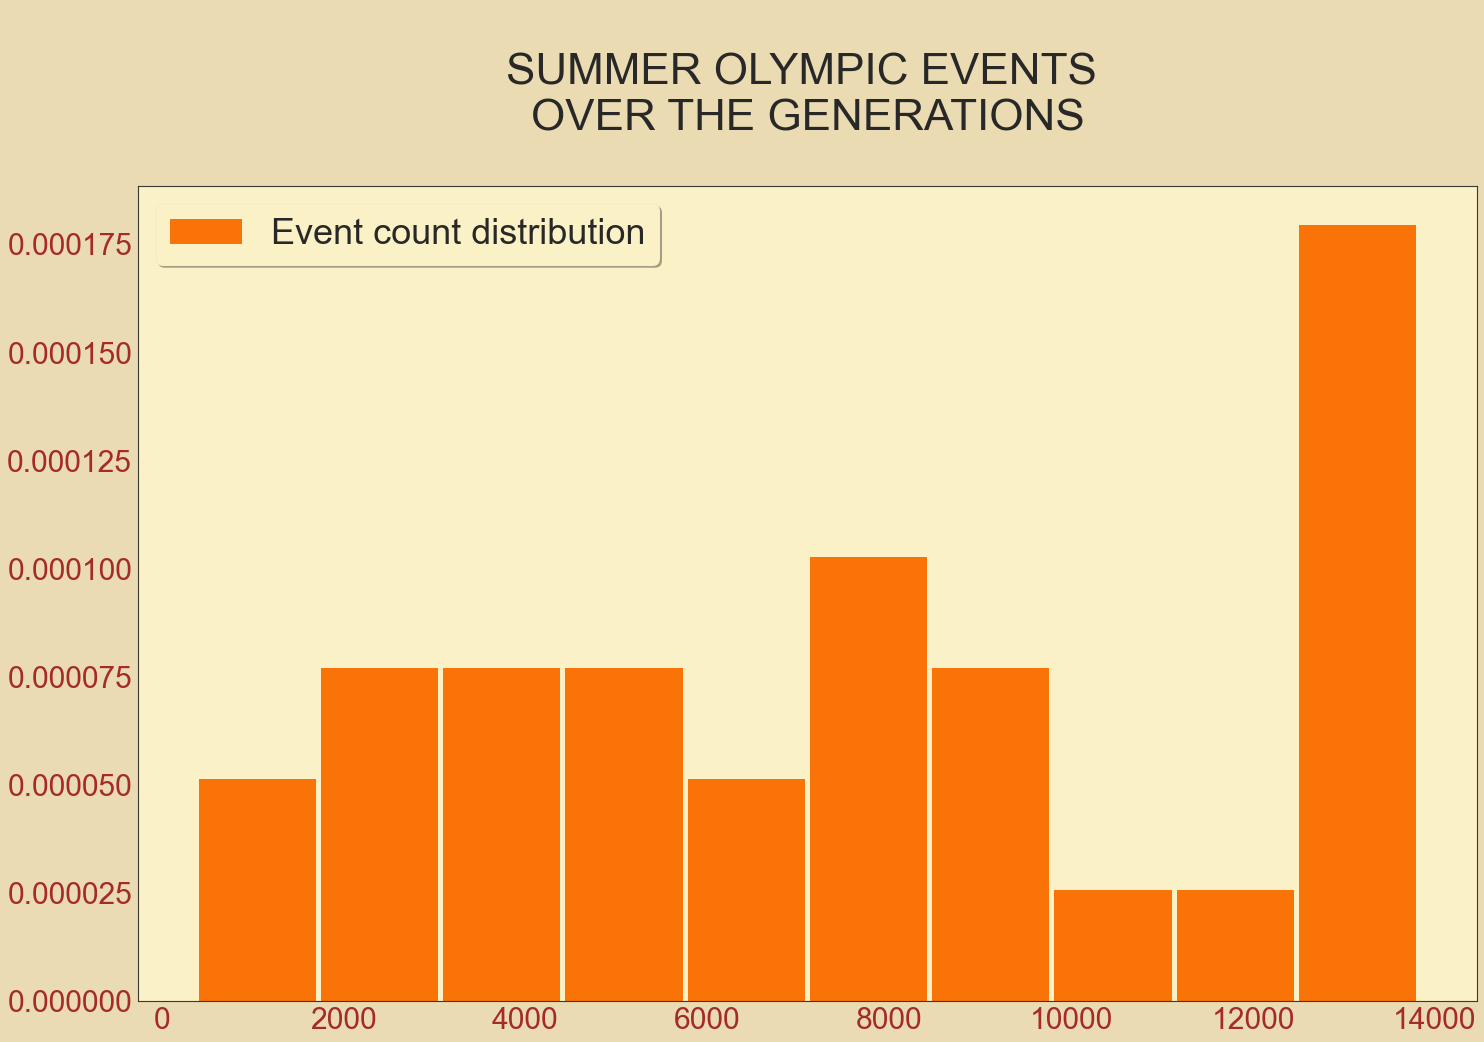

In [207]:
fig, ax = plt.subplots(1, figsize=(24,15))
x = np.array(event_count_summer['Event'])
ax.tick_params(axis='x', colors='brown', labelsize=30)
ax.tick_params(axis='y', colors='brown', labelsize=30)
plt.hist(x, bins=10, label='Event count distribution', rwidth=0.96, color='xkcd:orange', density=True)
plt.legend(prop={'size': 36},  shadow=True)
plt.title('\nSUMMER OLYMPIC EVENTS \nOVER THE GENERATIONS\n', fontsize=44)
plt.show()

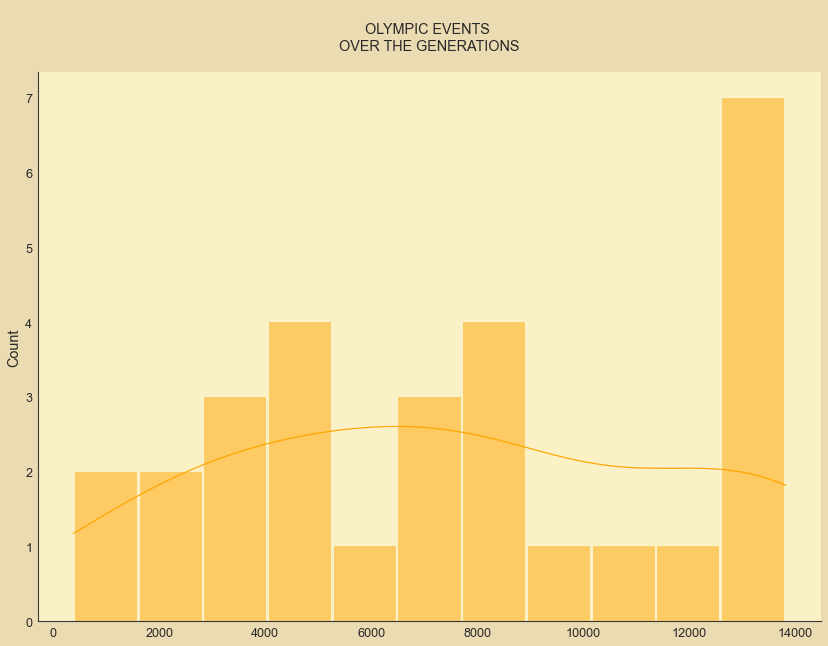

In [67]:
# seaborn cause why not
import seaborn as sns
fig = sns.displot(x, bins=11, kde=True, height=8.27, aspect=11.7/8.27, color='orange',
            shrink=0.96
           ).set(
            title='\nSUMMER OLYMPIC EVENTS \nOVER THE GENERATIONS\n'
            )
plt.show()


Winter games:

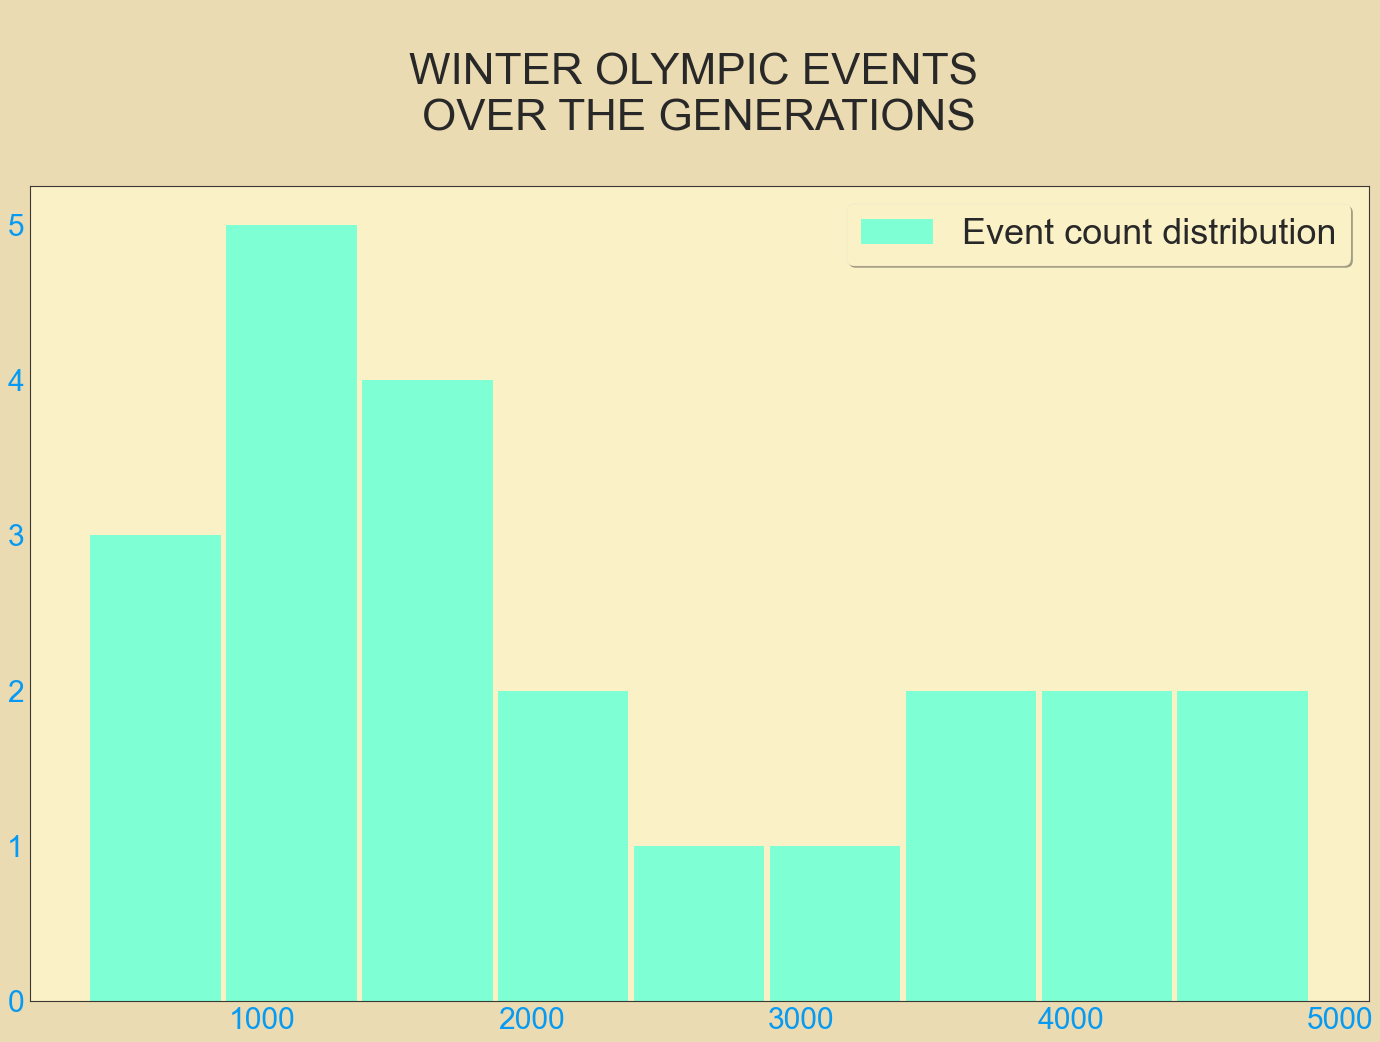

In [208]:
fig, ax = plt.subplots(1, figsize=(24,15))
x = np.array(event_count_winter['Event'])
ax.tick_params(axis='x', colors='xkcd:azure', labelsize=30)
ax.tick_params(axis='y', colors='xkcd:azure', labelsize=30)
plt.hist(x, bins=9, label='Event count distribution', rwidth=0.96, color='aquamarine')
plt.legend(prop={'size': 36},  shadow=True)
plt.title('\nWINTER OLYMPIC EVENTS \nOVER THE GENERATIONS\n', fontsize=44)
plt.show()

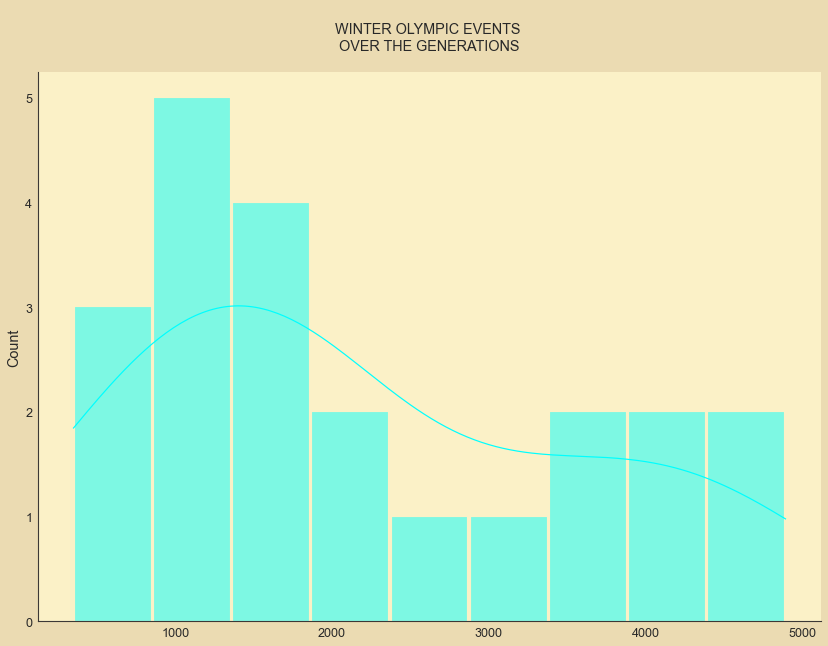

In [14]:
#seaborn, again
import seaborn as sns
fig = sns.displot(x, bins=9, kde=True, height=8.27, aspect=11.7/8.27, color='cyan',
            shrink=0.96
           ).set(
            title='\nWINTER OLYMPIC EVENTS \nOVER THE GENERATIONS\n'
            )
plt.show()

In plotly:

In [22]:
# summer events
fig = px.histogram(event_count_summer, x="Event", title="SUMMER OLYMPIC EVENTS OVER THE GENERATIONS", nbins=10, template = "seaborn", color_discrete_sequence=['orangered'])
fig.update_layout(bargap=0.1)
fig.show()

In [21]:
# winter events
fig = px.histogram(event_count_winter, x="Event", title="WINTER OLYMPIC EVENTS OVER THE GENERATIONS", nbins=10, template = "plotly_dark", color_discrete_sequence=['azure'])
fig.update_layout(bargap=0.1)
fig.show()

In [23]:
#plotly histograms with marginals
fig = px.histogram(event_count_winter, x="Event", title="WINTER OLYMPIC EVENTS OVER THE GENERATIONS", nbins=10, template = "plotly_dark", color_discrete_sequence=['azure'], marginal="rug")
fig.update_layout(bargap=0.1)
fig.show()

In [24]:
fig = px.histogram(event_count_winter, x="Event", title="WINTER OLYMPIC EVENTS OVER THE GENERATIONS", nbins=10, template = "plotly_dark", color_discrete_sequence=['azure'], marginal="box")
fig.update_layout(bargap=0.1)
fig.show()

In [206]:
fig = px.histogram(event_count_winter, x="Event", title="WINTER OLYMPIC EVENTS OVER THE GENERATIONS", nbins=10, template = "plotly_dark", color_discrete_sequence=['azure'], marginal="violin")
fig.update_layout(bargap=0.1)
fig.show()

Frequency polygons:


Text(0.5, 1.0, '\nSUMMER OLYMPIC EVENTS \nOVER THE GENERATIONS\n')

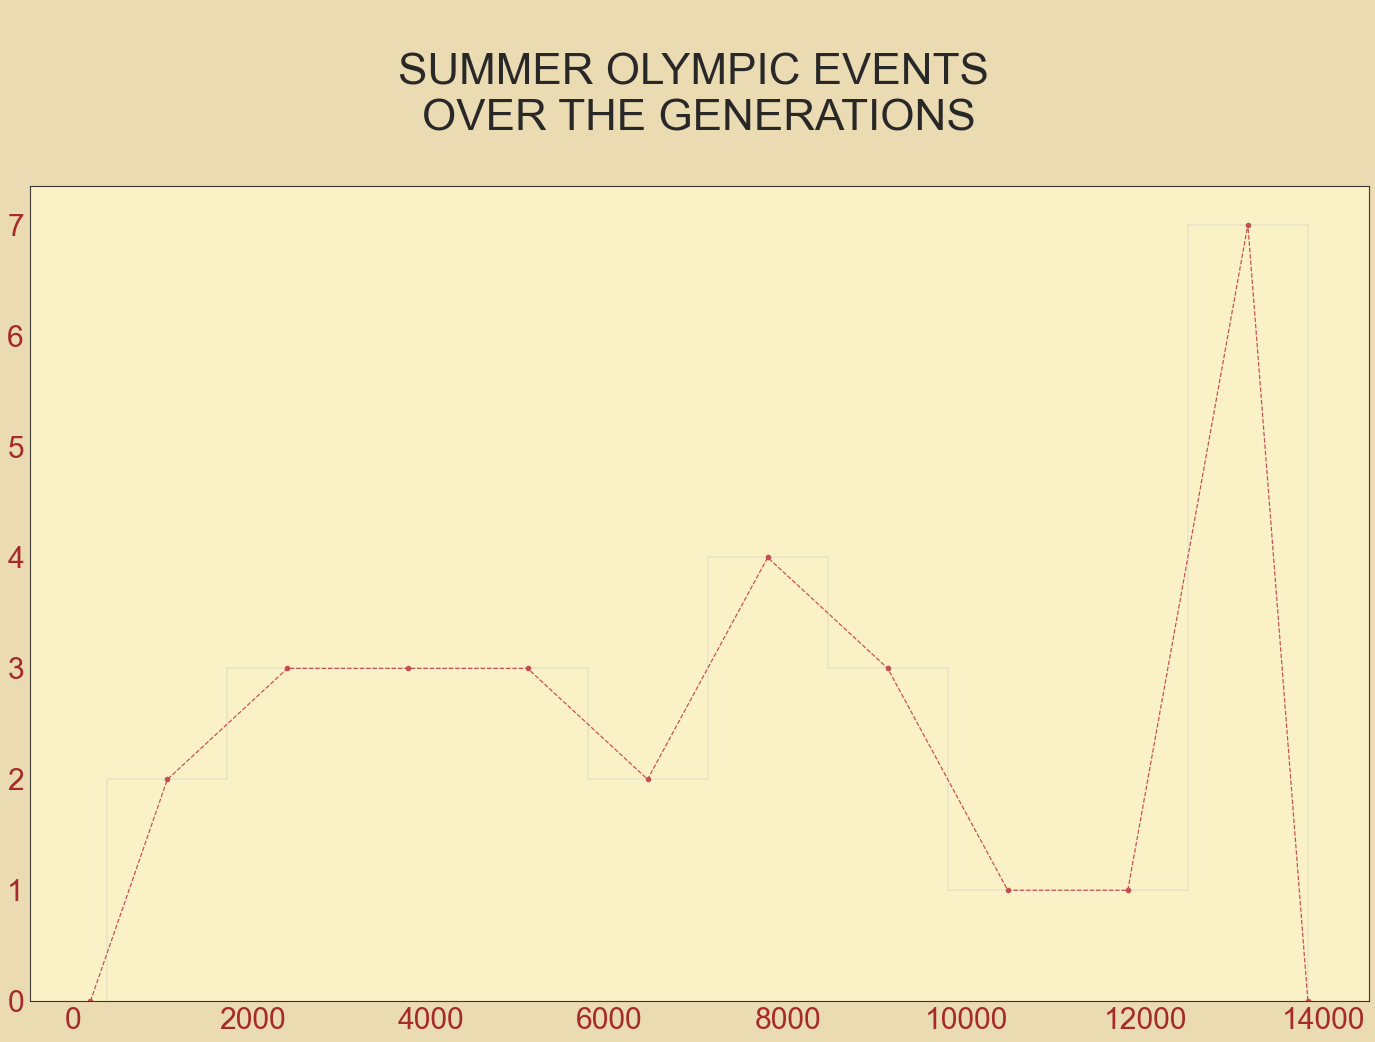

In [49]:
#matplotlib
fig, ax = plt.subplots(1, figsize=(24,15))
x = np.array(event_count_summer['Event'])
ax.tick_params(axis='x', colors='brown', labelsize=30)
ax.tick_params(axis='y', colors='brown', labelsize=30)
a, bins, c = plt.hist(x, bins=10, label='Event count - over time', rwidth=0.96, histtype='step') #hist first
l=list(bins)
l.insert(0,0)
l.insert(len(bins)+1,bins[len(bins)-1])
mid=[]
for i in range(len(l)-1):
      ele=(l[i]+l[i+1])/2
      mid.append(ele)
x=list(a)
x.insert(0,0)
x.insert(len(a)+1,0)
plt.plot(mid,x,'go--', color='r')
plt.title('\nSUMMER OLYMPIC EVENTS \nOVER THE GENERATIONS\n', fontsize=44)

Density Plots:


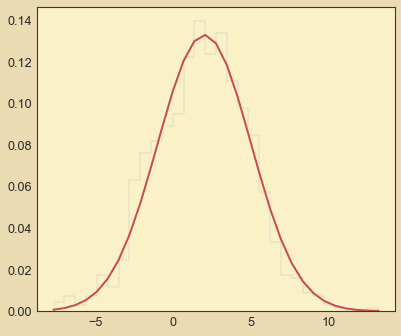

In [78]:
#matplotlib - don't use. Its extremely hard to visualise these plots accurately with most data.
# However they can be implemented to some degree
s = np.random.normal(2, 3, 1000)
count, bins, ignored = plt.hist(s, 30, density=True, histtype='step') # increase bins to normalize edges
plt.plot(bins, 1/(3 * np.sqrt(2 * np.pi)) * np.exp( - (bins - 2)**2 / (2 * 3**2) ), 
linewidth=2, color='r')
plt.show()
# print(x_norm)

Onto better plots now: 


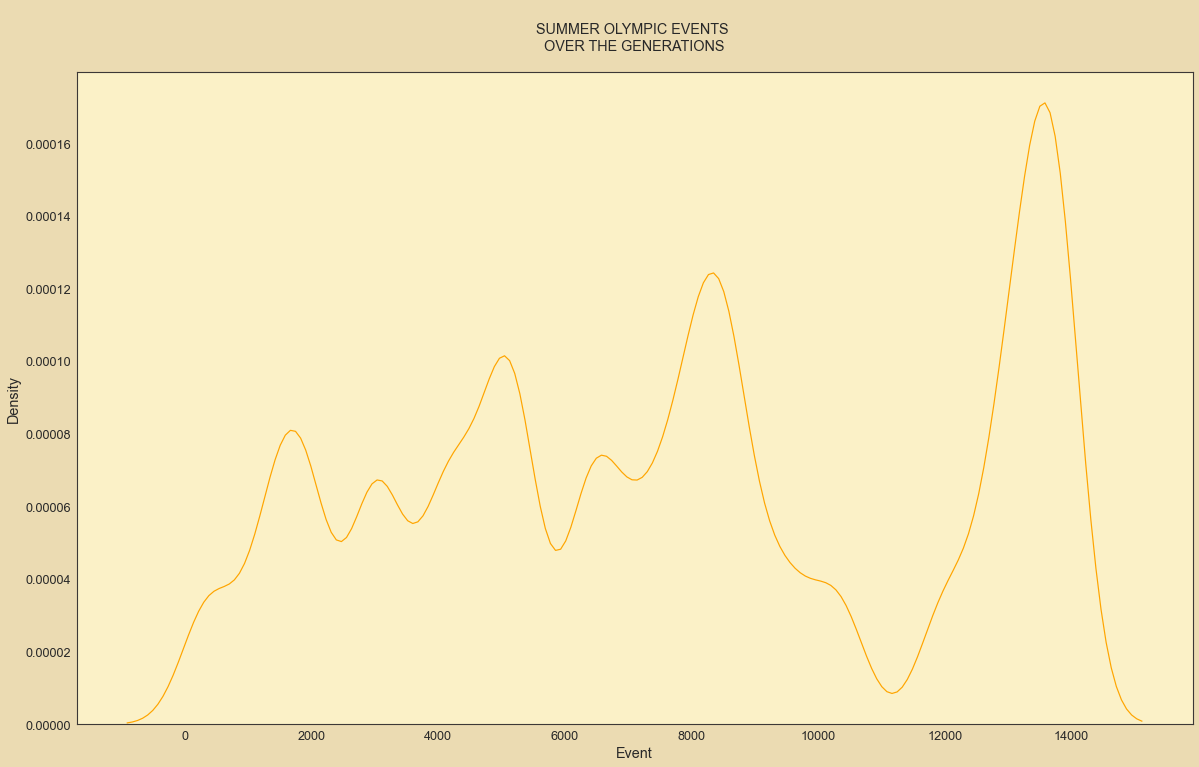

In [184]:
# seaborn kdeplots
fig = plt.subplots(1, figsize=(20,12))
sns.kdeplot(data=event_count_summer, x="Event", color='orange', bw=0.1).set(
            title='\nSUMMER OLYMPIC EVENTS \nOVER THE GENERATIONS\n'
            )
plt.show()

In [157]:
event_count_summer = event_count_summer.reset_index(level="Games")
event_count_winter = event_count_winter.reset_index(level="Games")
all_events_count = pd.concat([event_count_summer, event_count_winter], axis=0, ignore_index=True)

In [166]:
seasons = []
for game in all_events_count.Games:
    if "Winter" in game:
        seasons.append('Winter')
    else:
        seasons.append('Summer')

all_events_count['Season'] = seasons

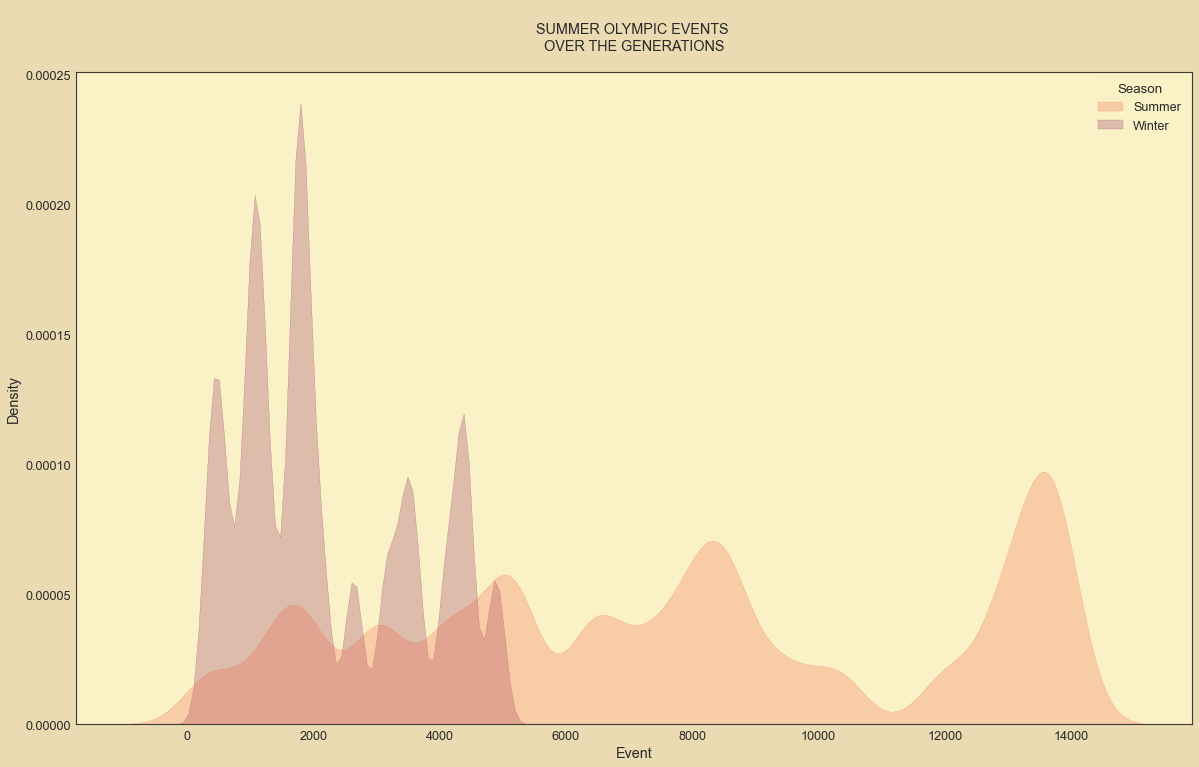

In [204]:
#stacked kdeplots
fig = plt.subplots(1, figsize=(20,12))
sns.kdeplot(data=all_events_count, x="Event", hue="Season", fill=True, palette="rocket_r", bw=0.1, common_grid=True).set(
            title='\nSUMMER OLYMPIC EVENTS \nOVER THE GENERATIONS\n'
            )
plt.show()

Plotly distplots are basically just histograms with a density estimate curve, smoothed by a gaussian function. Veering away from our dataset, we can generate a set of random floats following a normal/gaussian distribution to visualize what we want to see.

In [226]:
import plotly.figure_factory as ff
x1 = np.random.randn(200) - 2
x2 = np.random.randn(200
hist_data = [x1, x2]
group_labels = ['Group 1', 'Group 2']


fig = ff.create_distplot(hist_data, group_labels, bin_size=.2)
fig.update_layout(title_text='Distplot with Kernel Density Estimation Distribution')
fig.show()


In [225]:
# the kde can be overriden to plot a normal curve instead
x1 = np.random.randn(200)
x2 = np.random.randn(200) + 2

group_labels = ['Group 1', 'Group 2']

colors = ['slategray', 'magenta']

# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot([x1, x2], group_labels, bin_size=.5,
                         curve_type='normal', # override default 'kde'
                         colors=colors)

# Add title
fig.update_layout(title_text='Distplot with Normal Distribution')
fig.show()

If we only want to see the curve we can hide the histogram by setting showHist to False

In [229]:

x1 = np.random.randn(200) - 1
x2 = np.random.randn(200)
x3 = np.random.randn(200) + 1

hist_data = [x1, x2, x3]

group_labels = ['Group 1', 'Group 2', 'Group 3']
colors = ['#333F44', '#37AA9C', '#94F3E4']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, colors=colors)
fig.show()

*Important reminder to read and interpret distribution plots correctly*
Histograms are not bar graphs
Kdeplots are not line graphs